Group Number : - 24

1) Bhavana Koppula - K2278142

2) Jickson Dijo Mathew - K2258245

3) Bhavana Raj Nagaraj Srinivasappa - K2267997

4) Darpan Sanjay Agarwal - K2279745

**Latest Version of Sklearn**

In [527]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Importing required library for our assignment**

In [528]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import decomposition

#libraries for evaluting the clustering code
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics.cluster import rand_score, adjusted_rand_score

#libraries for clustering method
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import DBSCAN
from sklearn.cluster import Birch


#libraries for classification method 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

#libraries for evaluation and plotting
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from itertools import cycle

import warnings
warnings.filterwarnings('ignore')

## **Part I: Load data**

**Loading data**

In [529]:
wine_dataset = datasets.load_wine()
print("Details for Wine dataset as follows: ",wine_dataset)

Details for Wine dataset as follows:  {'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [530]:
no_of_samples = wine_dataset.data.shape[0]

no_of_dimension = wine_dataset.data.shape[1]

no_of_classes = wine_dataset.target_names.shape[0]

name_of_wine_class = wine_dataset.target_names
name_of_classes = list(name_of_wine_class)

no_of_samples_per_class = np.unique(wine_dataset.target, return_counts=True)[1]

print("The number of sample for our wine dataset is: ",no_of_samples)
print("The number of dimensions/features/attributes is: ",no_of_dimension)
print("The number of classes is: ",no_of_classes)
print("The name of classes are: ",name_of_classes)
print("The number of samples per class: ",no_of_samples_per_class)

The number of sample for our wine dataset is:  178
The number of dimensions/features/attributes is:  13
The number of classes is:  3
The name of classes are:  ['class_0', 'class_1', 'class_2']
The number of samples per class:  [59 71 48]


## **Part II: Clustering**

**Clustering Methods used:**

1.   K Means Clustering
2.   GMM Clustering
3.   Agglomerative Clustering
4.   Spectral Clustering
5.   Affinity Based Clustering
6.   DBSCAN Clustering
7.   Birch Clustering


Note: Spectral,Affinity,DBSCAN and Birch clustering reference has been taken from Sklearn library guide

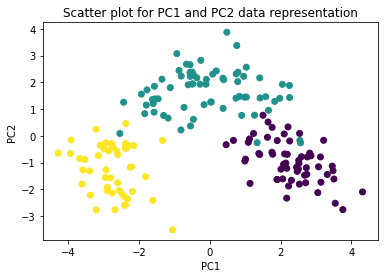

In [531]:
#Loading attributes and classes
X = wine_dataset.data
y = wine_dataset.target

#Transforming the data with standard scaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

#Performing the PCA for 90 percent of data distribution and considering Principal component 1 and 2 for plotting scatter plot
pca = decomposition.PCA(n_components=0.90,random_state=42)
pca.fit(X)
X = pca.transform(X)

#Plotting the scatter plot for PC1 and PC2
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Scatter plot for PC1 and PC2 data representation")
plt.show()


## **K Means Clustering Method**

The results are {2: 0.29300483220390083, 3: 0.3149696954705562, 4: 0.27234584362730535, 5: 0.2565142692031584, 6: 0.21557471462889558, 7: 0.20140264710161324, 8: 0.1570931410023405, 9: 0.17185856605115557}
This is the best Size 3


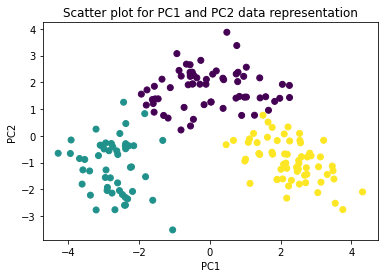

In [532]:
#Identifying the best number of clusters using  silhouette score
num_clusters = np.arange(2,10)
results = {}
for size in num_clusters:
    model = KMeans(n_clusters = size).fit(X)
    predictions = model.predict(X)
    results[size] = silhouette_score(X, predictions)
print("The results are", results)
best_size = max(results, key=results.get)
print("This is the best Size",best_size)

#Scatter plot representation after clustering method 
model = KMeans(n_clusters=3,random_state=42).fit(X)
labels = model.labels_
labels
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Scatter plot for PC1 and PC2 data representation")
plt.show()

**Internal Evaluation for K Means Clustering**

In [533]:
#Internal evaluation clustering metrics 
print("The Silhoutte Score for K means Clustering is: ",silhouette_score(X, labels))
print("The Calinski Harabasz Score for K means Clustering is: ",calinski_harabasz_score(X, labels))
print("The Davies Bouldin Score for K means Clustering is: ",davies_bouldin_score(X, labels))

The Silhoutte Score for K means Clustering is:  0.3149696954705562
The Calinski Harabasz Score for K means Clustering is:  82.74550597534879
The Davies Bouldin Score for K means Clustering is:  1.2668818314972174


**External Evaluation for K Means Clustering**

In [534]:
#External evaluation clustering metrics 
print("The V Measure Score for K means Clustering is: ",v_measure_score(y,labels))
print("The Rand Score for K means Clustering is: ",rand_score(y,labels))
print("The Adjusted Rand Score for K means Clustering is: ",adjusted_rand_score(y,labels))

The V Measure Score for K means Clustering is:  0.875893534122307
The Rand Score for K means Clustering is:  0.9542944201104552
The Adjusted Rand Score for K means Clustering is:  0.8974949815093207


## **GMM CLustering Method**

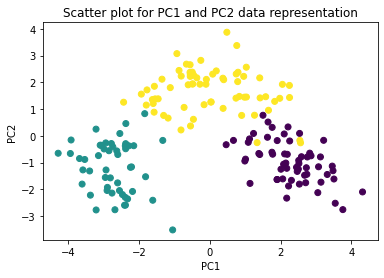

In [535]:
#Identifying the best number of clusters using  silhouette score
mixture = GaussianMixture(n_components=3)
mixture.labels_ = mixture.fit_predict(X)

model = mixture
predictions = model.predict(X)
labels = mixture.labels_
labels

#Scatter plot representation after clustering method 
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Scatter plot for PC1 and PC2 data representation")
plt.show()

**Internal Evaluation For GMM Clustering**

In [536]:
#Internal evaluation clustering metrics 
print("The Silhoutte Score for GMM Clustering is: ",silhouette_score(X, labels))
print("The Calinski Harabasz Score for GMM Clustering is: ",calinski_harabasz_score(X, labels))
print("The Davies Bouldin Score for GMM Clustering is: ",davies_bouldin_score(X, labels))

The Silhoutte Score for GMM Clustering is:  0.31263651390961533
The Calinski Harabasz Score for GMM Clustering is:  80.35984373053516
The Davies Bouldin Score for GMM Clustering is:  1.2849668025848002


**External Evaluation for GMM CLustering**

In [537]:
#External evaluation clustering metrics 
print("The V Measure Score for GMM Clustering is: ",v_measure_score(y,labels))
print("The Rand Score for GMM Clustering is: ",rand_score(y,labels))
print("The Adjusted Rand Score for GMM Clustering is: ",adjusted_rand_score(y,labels))

The V Measure Score for GMM Clustering is:  0.954800188313306
The Rand Score for GMM Clustering is:  0.985145686535898
The Adjusted Rand Score for GMM Clustering is:  0.9667411092064137


## **Agglomerative Clustering Method**

The results are {2: 0.2917466239133333, 3: 0.30471085667293246, 4: 0.3105118900395095, 5: 0.253354225819586, 6: 0.22439288399227508, 7: 0.22880652975358362, 8: 0.22596301596707075, 9: 0.22541697553414755}
This is the best Size 4
[3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 1 1 0 0 0 3 3 0 1 2 1 3 0 2
 0 0 0 1 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


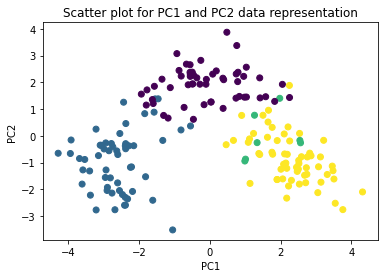

In [538]:
#Identifying the best number of clusters using  silhouette score
num_clusters = np.arange(2,10)
results = {}
for size in num_clusters:
    model = AgglomerativeClustering(n_clusters = size).fit(X)
    predictions = model.fit_predict(X)
    results[size] = silhouette_score(X, predictions)
print("The results are", results)
best_size = max(results, key=results.get)
print("This is the best Size",best_size)

model = AgglomerativeClustering(n_clusters=best_size).fit(X)
labels = model.labels_
print(labels)

#Scatter plot representation after clustering method 
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Scatter plot for PC1 and PC2 data representation")
plt.show()

**Internal Evaluation for Agglomerative Clustering**

In [539]:
#Internal evaluation clustering metrics 
print("The Silhoutte Score for Agglomerative Clustering is: ",silhouette_score(X, labels))
print("The Calinski Harabasz Score for Agglomerative Clustering is: ",calinski_harabasz_score(X, labels))
print("The Davies Bouldin Score for Agglomerative Clustering is: ",davies_bouldin_score(X, labels))

The Silhoutte Score for Agglomerative Clustering is:  0.3105118900395095
The Calinski Harabasz Score for Agglomerative Clustering is:  60.86688881328423
The Davies Bouldin Score for Agglomerative Clustering is:  1.4436220014165975


**External Evaluation for Agglomerative Clustering**

In [540]:
#External evaluation clustering metrics 
print("The V Measure Score for Agglomerative Clustering is: ",v_measure_score(y,labels))
print("The Rand Score for Agglomerative Clustering is: ",rand_score(y,labels))
print("The Adjusted Rand Score for Agglomerative Clustering is: ",adjusted_rand_score(y,labels))

The V Measure Score for Agglomerative Clustering is:  0.7513971332100301
The Rand Score for Agglomerative Clustering is:  0.8960198057512855
The Adjusted Rand Score for Agglomerative Clustering is:  0.7620810769832169


# **Spectral Clustering Method**

The results are {2: 0.29198669937876254, 3: 0.31513477142677254, 4: 0.2294504469044023, 5: 0.20185310195513503, 6: 0.16434206862181822, 7: 0.15672766954177358, 8: 0.14131347414831905, 9: 0.15166374133442925}
This is the best Size 3


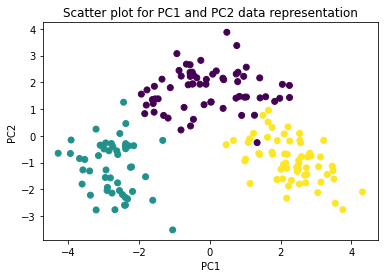

In [541]:
#Identifying the number of clusters
num_clusters = np.arange(2,10)
results = {}
for size in num_clusters:
    model = SpectralClustering(n_clusters=size,affinity='nearest_neighbors',assign_labels='kmeans',random_state=42).fit(X)
    labels = model.labels_
    results[size] = silhouette_score(X, labels)
print("The results are", results)
best_size = max(results, key=results.get)
print("This is the best Size",best_size)

model = SpectralClustering(n_clusters=3,affinity='nearest_neighbors',assign_labels='kmeans',random_state=42).fit(X)
labels = model.labels_
labels

#Scatter plot representation after clustering method 
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Scatter plot for PC1 and PC2 data representation")
plt.show()

**Internal Evaluation for Spectral Clustering**

In [542]:
#Internal evaluation clustering metrics
print("The Silhoutte Score for Spectral Clustering is: ",silhouette_score(X, labels))
print("The Calinski Harabasz Score for Spectral Clustering is: ",calinski_harabasz_score(X, labels))
print("The Davies Bouldin Score for Spectral Clustering is: ",davies_bouldin_score(X, labels))

The Silhoutte Score for Spectral Clustering is:  0.31513477142677254
The Calinski Harabasz Score for Spectral Clustering is:  82.33953275666731
The Davies Bouldin Score for Spectral Clustering is:  1.2734494291660676


**External Evaluation for Spectral Clustering**

In [543]:
#External evaluation clustering metrics
print("The V Measure Score for Spectral Clustering is: ",v_measure_score(y,labels))
print("The Rand Score for Spectral Clustering is: ",rand_score(y,labels))
print("The Adjusted Rand Score for Spectral Clustering is: ",adjusted_rand_score(y,labels))

The V Measure Score for Spectral Clustering is:  0.8920222215557123
The Rand Score for Spectral Clustering is:  0.9613406970100933
The Adjusted Rand Score for Spectral Clustering is:  0.9133577991086984


## **Affinity Based Clustering Method**

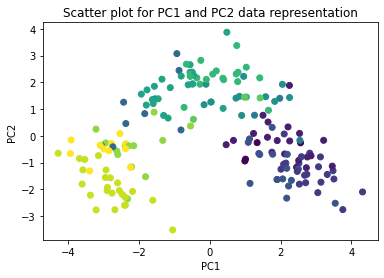

In [544]:
#Identifying the number of clusters
af = AffinityPropagation(damping=0.8,random_state=42).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

#Scatter plot representation after clustering method 
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Scatter plot for PC1 and PC2 data representation")
plt.show()

**Internal Evaluation for Affinity Based Clustering**

In [545]:
#Internal evaluation clustering metrics
print("The Silhoutte Score for Affinity Based Clustering is: ",silhouette_score(X, labels))
print("The Calinski Harabasz Score for Affinity Based Clustering is: ",calinski_harabasz_score(X, labels))
print("The Davies Bouldin Score for Affinity Based Clustering is: ",davies_bouldin_score(X, labels))

The Silhoutte Score for Affinity Based Clustering is:  0.15253573498451584
The Calinski Harabasz Score for Affinity Based Clustering is:  33.30885740533789
The Davies Bouldin Score for Affinity Based Clustering is:  1.469891379102644


**External Evaluation for Affinity Based Clustering**

In [546]:
#External evaluation clustering metrics
print("The V Measure Score for Affinity Based Clustering is: ",v_measure_score(y,labels))
print("The Rand Score for Affinity Based Clustering is: ",rand_score(y,labels))
print("The Adjusted Rand Score for Affinity Based Clustering is: ",adjusted_rand_score(y,labels))

The V Measure Score for Affinity Based Clustering is:  0.5530683779453832
The Rand Score for Affinity Based Clustering is:  0.7457627118644068
The Adjusted Rand Score for Affinity Based Clustering is:  0.30933457541400805


## **DBSCAN Clustering Method**

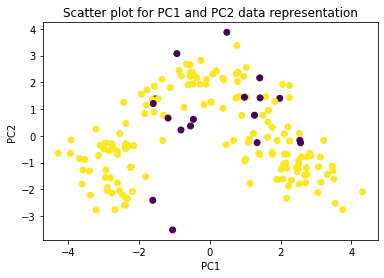

In [547]:
#Model building for the clustering methods
model = DBSCAN(eps=2.5, min_samples=10).fit(X)
labels = model.labels_
labels
#Scatter plot representation after clustering method 
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Scatter plot for PC1 and PC2 data representation")
plt.show()

**Internal Evaluation for DBSCAN Clustering**

In [548]:
#Internal evaluation clustering metrics
print("The Silhoutte Score for DBSCAN Clustering is: ",silhouette_score(X, labels))
print("The Calinski Harabasz Score for DBSCAN Clustering is: ",calinski_harabasz_score(X, labels))
print("The Davies Bouldin Score for DBSCAN Clustering is: ",davies_bouldin_score(X, labels))

The Silhoutte Score for DBSCAN Clustering is:  0.17942260669931342
The Calinski Harabasz Score for DBSCAN Clustering is:  4.201690759245722
The Davies Bouldin Score for DBSCAN Clustering is:  4.295002491623073


**External Evaluation for DBSCAN Clustering**

In [549]:
#External evaluation clustering metrics
print("The V Measure Score for DBSCAN Clustering is: ",v_measure_score(y,labels))
print("The Rand Score for DBSCAN Clustering is: ",rand_score(y,labels))
print("The Adjusted Rand Score for DBSCAN Clustering is: ",adjusted_rand_score(y,labels))

The V Measure Score for DBSCAN Clustering is:  0.09620617304903832
The Rand Score for DBSCAN Clustering is:  0.39738462515076495
The Adjusted Rand Score for DBSCAN Clustering is:  0.00028350315478484076


## **Birch Clustering Method**

The results are {2: 0.2917466239133333, 3: 0.3030274422846647, 4: 0.27621766090724775, 5: 0.22349558813882925, 6: 0.2289871488724809, 7: 0.21718419198616712, 8: 0.2214457785728773, 9: 0.22583936890889095}
This is the best Size 3


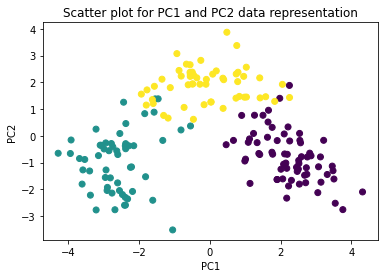

In [550]:
#Model building for the clustering methods
num_clusters = np.arange(2,10)
results = {}
for size in num_clusters:
    model =Birch(n_clusters = size).fit(X)
    predictions = model.predict(X)
    results[size] = silhouette_score(X, predictions)
print("The results are", results)
best_size = max(results, key=results.get)
print("This is the best Size",best_size)

model = Birch(threshold=0.03,n_clusters=3).fit(X)
labels = model.labels_
labels

#Scatter plot representation after clustering method
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Scatter plot for PC1 and PC2 data representation")
plt.show()

**Internal Evaluation for Birch Clustering** 

In [551]:
#Internal evaluation clustering metrics
print("The Silhoutte Score for Birch Clustering is: ",silhouette_score(X, labels))
print("The Calinski Harabasz Score for Birch Clustering is: ",calinski_harabasz_score(X, labels))
print("The Davies Bouldin Score for Birch Clustering is: ",davies_bouldin_score(X, labels))

The Silhoutte Score for Birch Clustering is:  0.30471085667293246
The Calinski Harabasz Score for Birch Clustering is:  79.84780141112057
The Davies Bouldin Score for Birch Clustering is:  1.2626646761585987


**External Evaluation for Birch Clustering** 

In [552]:
#External evaluation clustering metrics
print("The V Measure Score for Birch Clustering is: ",v_measure_score(y,labels))
print("The Rand Score for Birch Clustering is: ",rand_score(y,labels))
print("The Adjusted Rand Score for Birch Clustering is: ",adjusted_rand_score(y,labels))

The V Measure Score for Birch Clustering is:  0.7515127812238401
The Rand Score for Birch Clustering is:  0.8857360502761379
The Adjusted Rand Score for Birch Clustering is:  0.7436191685056265


## **Part III: Classification**

1.   KNN Classification
2.   Decision Tree Classification
3.   Random Forest Classification
4.   SVM Classification
5.   Naive Bayes Gaussian Classification

Note : KNN and Naive Bayes Guassian classification is refered from SKlearn library guide

In [553]:
#Loading wine data into X and y
wine_dataset = datasets.load_wine()
X = wine_dataset.data
y = wine_dataset.target
class_names = wine_dataset.target_names

## **KNN Classification**

**Split Data Protocol**

In [554]:
#Splitiing the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [555]:
#Training KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6779661016949152


In [556]:
#Evaluation for classification method
print("The Balanced Accuracy Score for KNN Classification is: ",balanced_accuracy_score(y_test,y_pred ))
print("The Precision Score for KNN Classification is: ",precision_score(y_test, y_pred, average="macro"))
print("The Recall Score for KNN Classification is: ",recall_score(y_test, y_pred, average="macro"))
print("The F1 Score for KNN Classification is: ",f1_score(y_test, y_pred, average="macro"))

The Balanced Accuracy Score for KNN Classification is:  0.6611111111111111
The Precision Score for KNN Classification is:  0.6611111111111111
The Recall Score for KNN Classification is:  0.6611111111111111
The F1 Score for KNN Classification is:  0.6611111111111111


Confusion matrix
[[17  1  2]
 [ 2 16  6]
 [ 1  7  7]]


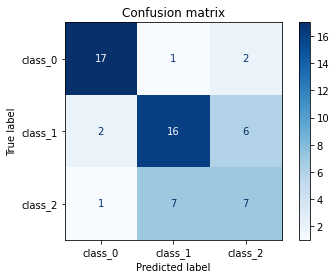

In [557]:
#Confusion Matrix representation
#Confusion matrix (no date) scikit. Available at: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html (Accessed: February 16, 2023).
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay.from_estimator(knn,X_test,y_test,display_labels=class_names,cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion matrix")
print("Confusion matrix")
print(disp.confusion_matrix)
plt.show()

Macro-averaged One-vs-Rest ROC AUC score:
0.88


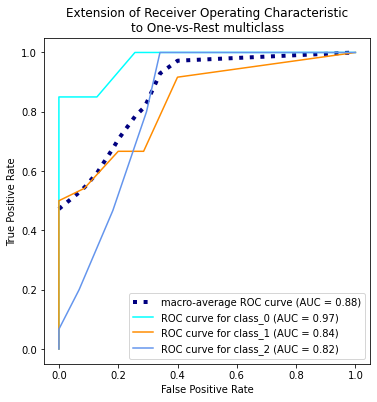

In [558]:
#Calculating the ROC AUC SCORE
#Nkitgupta (2021) Evaluation metrics for multi-class Classification, Kaggle. Kaggle. Available at: https://www.kaggle.com/code/nkitgupta/evaluation-metrics-for-multi-class-classification (Accessed: February 16, 2023).
#Multiclass receiver operating characteristic (ROC) (no date) scikit. Available at: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html (Accessed: February 16, 2023).

def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):
  unique_class = set(actual_class)
  roc_auc_dict = {}
  for per_class in unique_class:
    other_class = [x for x in unique_class if x != per_class]
    new_actual_class = [0 if x in other_class else 1 for x in actual_class]
    new_pred_class = [0 if x in other_class else 1 for x in pred_class]

    roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
    roc_auc_dict[per_class] = roc_auc

    return roc_auc_dict

roc_auc_dict = roc_auc_score_multiclass(y_test, y_pred)
roc_auc_dict

n_samples, n_features = X.shape
n_classes = len(np.unique(y))
target_names = wine_dataset.target_names

y_score = knn.fit(X_train, y_train).predict_proba(X_test)

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape

label_binarizer.transform([2])

class_of_interest = 2
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Variables for our roc plotting
knn_fpr = fpr["macro"]
knn_tpr = tpr["macro"]
knn_roc_auc = roc_auc["macro"]

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

fig, ax = plt.subplots(figsize=(6, 6))



plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
    )


plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
plt.legend()
plt.show()

**K-fold cross-validation**

In [559]:
#K-Fold cross validation implemetation
k = 8

# Define the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Define the k-fold cross-validation
kfold = KFold(n_splits=k)
precision_scores = []
accuracy_score = []
recall_scores = []
f1_scores = []

#Training the model and calculating the scores
for train_index, test_index in kfold.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)

  precision = precision_score(y_test, y_pred,average = 'macro', pos_label=0)
  precision_scores.append(precision)

  accuracy = balanced_accuracy_score(y_test,y_pred)
  accuracy_score.append(precision)

  recall = recall_score(y_test, y_pred,average = 'macro', pos_label=0)
  recall_scores.append(recall)

  f1 = f1_score(y_test, y_pred, average = 'macro', pos_label=0)
  f1_scores.append(f1)


In [560]:
#Evalation score
mean_precision = np.mean(precision_scores)
print("The Mean precision score for KFold is: ", mean_precision)

mean_accuracy = np.mean(accuracy_score)
print("The Mean accuracy score for KFold is: ", mean_accuracy)

mean_recall_score = np.mean(recall_scores)
print("The Mean recall score for KFold is: ", mean_recall_score)

mean_f1_score = np.mean(f1_scores)
print("The Mean f1 score for KFold is: ", mean_f1_score)

The Mean precision score for KFold is:  0.4392857142857143
The Mean accuracy score for KFold is:  0.4392857142857143
The Mean recall score for KFold is:  0.30705835529205094
The Mean f1 score for KFold is:  0.3359344033195062


## **Decision Tree Classification**

In [561]:
#Data Loading
wine_dataset = datasets.load_wine()
X = wine_dataset.data
y = wine_dataset.target
class_names = wine_dataset.target_names

**Split Data Protocol**

In [562]:
#Splitiing the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [563]:
#Training Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
# Fit the classifier to the training data
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9661016949152542


In [564]:
#Evaluation score calculation
print("The Balanced Accuracy Score for Decision Tree Classification is: ",balanced_accuracy_score(y_test,y_pred ))
print("The Precision Score for Decision Tree Classification is: ",precision_score(y_test, y_pred, average="macro"))
print("The Recall Score for Decision Tree Classification is: ",recall_score(y_test, y_pred, average="macro"))
print("The F1 Score for Decision Tree Classification is: ",f1_score(y_test, y_pred, average="macro"))

The Balanced Accuracy Score for Decision Tree Classification is:  0.9611111111111111
The Precision Score for Decision Tree Classification is:  0.9700000000000001
The Recall Score for Decision Tree Classification is:  0.9611111111111111
The F1 Score for Decision Tree Classification is:  0.9650363593713348


Confusion matrix
[[19  1  0]
 [ 0 24  0]
 [ 1  0 14]]


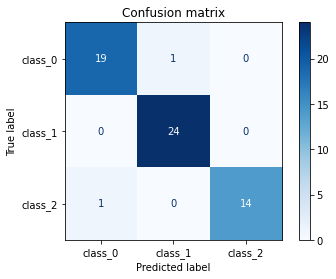

In [565]:
#Confusion Matrix representation
#Confusion matrix (no date) scikit. Available at: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html (Accessed: February 16, 2023).

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay.from_estimator(clf,X_test,y_test,display_labels=class_names,cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion matrix")
print("Confusion matrix")
print(disp.confusion_matrix)
plt.show()

Macro-averaged One-vs-Rest ROC AUC score:
0.97


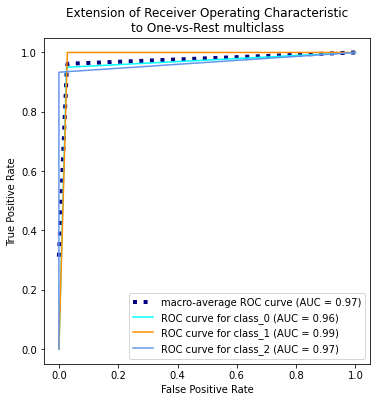

In [566]:
#Calculating the ROC AUC SCORE
#Nkitgupta (2021) Evaluation metrics for multi-class Classification, Kaggle. Kaggle. Available at: https://www.kaggle.com/code/nkitgupta/evaluation-metrics-for-multi-class-classification (Accessed: February 16, 2023).
#Multiclass receiver operating characteristic (ROC) (no date) scikit. Available at: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html (Accessed: February 16, 2023).


def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):
  unique_class = set(actual_class)
  roc_auc_dict = {}
  for per_class in unique_class:
    other_class = [x for x in unique_class if x != per_class]
    new_actual_class = [0 if x in other_class else 1 for x in actual_class]
    new_pred_class = [0 if x in other_class else 1 for x in pred_class]

    roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
    roc_auc_dict[per_class] = roc_auc

    return roc_auc_dict

roc_auc_dict = roc_auc_score_multiclass(y_test, y_pred)
roc_auc_dict

n_samples, n_features = X.shape
n_classes = len(np.unique(y))
target_names = wine_dataset.target_names

y_score = clf.fit(X_train, y_train).predict_proba(X_test)

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape

label_binarizer.transform([2])

class_of_interest = 2
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Variables for our roc plotting
dtc_fpr = fpr["macro"]
dtc_tpr = tpr["macro"]
dtc_roc_auc = roc_auc["macro"]

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

fig, ax = plt.subplots(figsize=(6, 6))



plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
    )


plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
plt.legend()
plt.show()

**K-fold cross-validation**

**Training Code**

In [567]:
#K-Fold cross validation implemetation
k = 8

# Define the KNN classifier
clf = DecisionTreeClassifier(random_state=42)

# Define the k-fold cross-validation
kfold = KFold(n_splits=k)
precision_scores = []
accuracy_score = []
recall_scores = []
f1_scores = []

#Training the model and claculating the evaluation score
for train_index, test_index in kfold.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  precision = precision_score(y_test, y_pred,average = 'macro', pos_label=0)
  precision_scores.append(precision)

  accuracy = balanced_accuracy_score(y_test,y_pred)
  accuracy_score.append(precision)

  recall = recall_score(y_test, y_pred,average = 'macro', pos_label=0)
  recall_scores.append(recall)

  f1 = f1_score(y_test, y_pred, average = 'macro', pos_label=0)
  f1_scores.append(f1)

**Evaluation Code**

In [568]:
#Evaluation 
mean_precision = np.mean(precision_scores)
print("The Mean precision score for KFold is: ", mean_precision)

mean_accuracy = np.mean(accuracy_score)
print("The Mean accuracy score for KFold is: ", mean_accuracy)

mean_recall_score = np.mean(recall_scores)
print("The Mean recall score for KFold is: ", mean_recall_score)

mean_f1_score = np.mean(f1_scores)
print("The Mean f1 score for KFold is: ", mean_f1_score)

The Mean precision score for KFold is:  0.5488782051282051
The Mean accuracy score for KFold is:  0.5488782051282051
The Mean recall score for KFold is:  0.49346270677792414
The Mean f1 score for KFold is:  0.517856740923629


## **Random Forest Classification**

In [569]:
#Data import from wine dataset
wine_dataset = datasets.load_wine()
X = wine_dataset.data
y = wine_dataset.target
class_names = wine_dataset.target_names

**Split Data Protocol**

In [570]:
#Train and Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [571]:
#Model Building
clf = RandomForestClassifier(max_depth=2, random_state=42)
# Fit the classifier to the training data
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9830508474576272


In [572]:
#Evaluation scores
print("The Balanced Accuracy Score for Random Forest Classification is: ",balanced_accuracy_score(y_test,y_pred ))
print("The Precision Score for Random Forest Classification is: ",precision_score(y_test, y_pred, average="macro"))
print("The Recall Score for Random Forest Classification is: ",recall_score(y_test, y_pred, average="macro"))
print("The F1 Score for Random Forest Classification is: ",f1_score(y_test, y_pred, average="macro"))

The Balanced Accuracy Score for Random Forest Classification is:  0.9861111111111112
The Precision Score for Random Forest Classification is:  0.9841269841269842
The Recall Score for Random Forest Classification is:  0.9861111111111112
The F1 Score for Random Forest Classification is:  0.9847777201176267


Confusion matrix
[[20  0  0]
 [ 1 23  0]
 [ 0  0 15]]


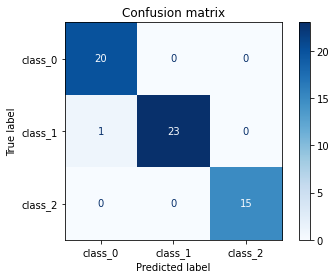

In [573]:
#Confusion Matrix representation
#Confusion matrix (no date) scikit. Available at: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html (Accessed: February 16, 2023).

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay.from_estimator(clf,X_test,y_test,display_labels=class_names,cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion matrix")
print("Confusion matrix")
print(disp.confusion_matrix)
plt.show()

Macro-averaged One-vs-Rest ROC AUC score:
1.00


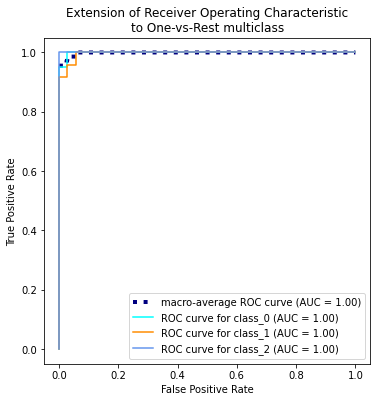

In [574]:
#Calculating the ROC AUC SCORE
#Nkitgupta (2021) Evaluation metrics for multi-class Classification, Kaggle. Kaggle. Available at: https://www.kaggle.com/code/nkitgupta/evaluation-metrics-for-multi-class-classification (Accessed: February 16, 2023).
#Multiclass receiver operating characteristic (ROC) (no date) scikit. Available at: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html (Accessed: February 16, 2023).


def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):
  unique_class = set(actual_class)
  roc_auc_dict = {}
  for per_class in unique_class:
    other_class = [x for x in unique_class if x != per_class]
    new_actual_class = [0 if x in other_class else 1 for x in actual_class]
    new_pred_class = [0 if x in other_class else 1 for x in pred_class]

    roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
    roc_auc_dict[per_class] = roc_auc

    return roc_auc_dict

roc_auc_dict = roc_auc_score_multiclass(y_test, y_pred)
roc_auc_dict

n_samples, n_features = X.shape
n_classes = len(np.unique(y))
target_names = wine_dataset.target_names

y_score = clf.fit(X_train, y_train).predict_proba(X_test)

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape

label_binarizer.transform([2])

class_of_interest = 2
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Variables for our roc plotting
rfc_fpr = fpr["macro"]
rfc_tpr = tpr["macro"]
rfc_roc_auc = roc_auc["macro"]

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

fig, ax = plt.subplots(figsize=(6, 6))



plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
    )


plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
plt.legend()
plt.show()

**K-Fold Cross Validation**

In [575]:
#K fold cross validation
k = 8

# Define the KNN classifier
clf = RandomForestClassifier(max_depth=2, random_state=42)

# Define the k-fold cross-validation
kfold = KFold(n_splits=k)
precision_scores = []
accuracy_score = []
recall_scores = []
f1_scores = []

#Training the model and score calcuation
for train_index, test_index in kfold.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  precision = precision_score(y_test, y_pred,average = 'macro', pos_label=0)
  precision_scores.append(precision)

  accuracy = balanced_accuracy_score(y_test,y_pred)
  accuracy_score.append(precision)

  recall = recall_score(y_test, y_pred,average = 'macro', pos_label=0)
  recall_scores.append(recall)

  f1 = f1_score(y_test, y_pred, average = 'macro', pos_label=0)
  f1_scores.append(f1)


In [576]:
#Evaluation score
mean_precision = np.mean(precision_scores)
print("The Mean precision score for KFold is: ", mean_precision)

mean_accuracy = np.mean(accuracy_score)
print("The Mean accuracy score for KFold is: ", mean_accuracy)

mean_recall_score = np.mean(recall_scores)
print("The Mean recall score for KFold is: ", mean_recall_score)

mean_f1_score = np.mean(f1_scores)
print("The Mean f1 score for KFold is: ", mean_f1_score)

The Mean precision score for KFold is:  0.7470238095238095
The Mean accuracy score for KFold is:  0.7470238095238095
The Mean recall score for KFold is:  0.7205249963402137
The Mean f1 score for KFold is:  0.7321888902143913


## **SVM Classification**

In [577]:
#Data load from wine data set
wine_dataset = datasets.load_wine()
X = wine_dataset.data
y = wine_dataset.target
class_names = wine_dataset.target_names

In [578]:
#Data Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [579]:
#Model Building
clf = svm.SVC(kernel='linear',probability=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy (SVM) :",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy (SVM) : 98.30508474576271


In [580]:
#Evaluation Score
print("The Balanced Accuracy Score for SVM Classification is: ",balanced_accuracy_score(y_test,y_pred ))
print("The Precision Score for SVM Classification is: ",precision_score(y_test, y_pred, average="macro"))
print("The Recall Score for SVM Classification is: ",recall_score(y_test, y_pred, average="macro"))
print("The F1 Score for SVM Classification is: ",f1_score(y_test, y_pred, average="macro"))

The Balanced Accuracy Score for SVM Classification is:  0.9861111111111112
The Precision Score for SVM Classification is:  0.9791666666666666
The Recall Score for SVM Classification is:  0.9861111111111112
The F1 Score for SVM Classification is:  0.9821551132463967


Confusion matrix, without normalization
[[20  0  0]
 [ 0 23  1]
 [ 0  0 15]]


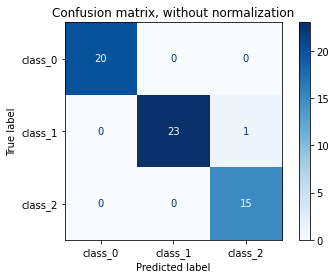

In [581]:
#Confusion Matrix representation
#Confusion matrix (no date) scikit. Available at: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html (Accessed: February 16, 2023).

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay.from_estimator(clf,X_test,y_test,display_labels=class_names,cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion matrix, without normalization")
print("Confusion matrix, without normalization")
print(disp.confusion_matrix)
plt.show()

Macro-averaged One-vs-Rest ROC AUC score:
1.00


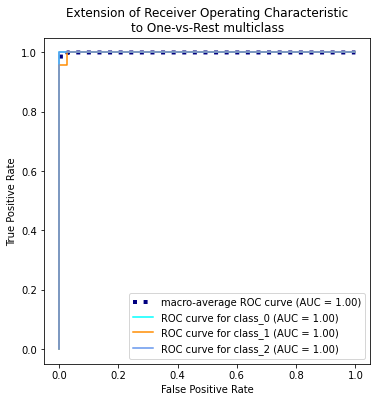

In [582]:
#Calculating the ROC AUC SCORE
#Nkitgupta (2021) Evaluation metrics for multi-class Classification, Kaggle. Kaggle. Available at: https://www.kaggle.com/code/nkitgupta/evaluation-metrics-for-multi-class-classification (Accessed: February 16, 2023).
#Multiclass receiver operating characteristic (ROC) (no date) scikit. Available at: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html (Accessed: February 16, 2023).


n_samples, n_features = X.shape
n_classes = len(np.unique(y))
target_names = wine_dataset.target_names

y_score = clf.fit(X_train, y_train).predict_proba(X_test)

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape

label_binarizer.transform([2])

class_of_interest = 2
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Variables for our roc plotting
svm_fpr = fpr["macro"]
svm_tpr = tpr["macro"]
svm_roc_auc = roc_auc["macro"]

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
    )


plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
plt.legend()
plt.show()

**K-Fold Cross Validation**

In [583]:
#K fold validation
k = 8

# Define the SVM classifier
clf = svm.SVC(kernel='linear',probability=True)

# Define the k-fold cross-validation
kfold = KFold(n_splits=k)
precision_scores = []
accuracy_score = []
recall_scores = []
f1_scores = []

#Training the model and calculating the score
for train_index, test_index in kfold.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  precision = precision_score(y_test, y_pred,average = 'macro', pos_label=0)
  precision_scores.append(precision)

  accuracy = balanced_accuracy_score(y_test,y_pred)
  accuracy_score.append(precision)

  recall = recall_score(y_test, y_pred,average = 'macro', pos_label=0)
  recall_scores.append(recall)

  f1 = f1_score(y_test, y_pred, average = 'macro', pos_label=0)
  f1_scores.append(f1)


In [584]:
#Evaluation score
mean_precision = np.mean(precision_scores)
print("The Mean precision score for KFold is: ", mean_precision)

mean_accuracy = np.mean(accuracy_score)
print("The Mean accuracy score for KFold is: ", mean_accuracy)

mean_recall_score = np.mean(recall_scores)
print("The Mean recall score for KFold is: ", mean_recall_score)

mean_f1_score = np.mean(f1_scores)
print("The Mean f1 score for KFold is: ", mean_f1_score)

The Mean precision score for KFold is:  0.6633771929824561
The Mean accuracy score for KFold is:  0.6633771929824561
The Mean recall score for KFold is:  0.6275961608842044
The Mean f1 score for KFold is:  0.6435401012412958


## **Naive Bayes Gaussian Classification Method**

In [585]:
#Importing the data
wine_dataset = datasets.load_wine()
X = wine_dataset.data
y = wine_dataset.target
class_names = wine_dataset.target_names

In [586]:
#Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [587]:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [588]:
#Evlaution score
print("The Balanced Accuracy Score for Naive Bayes Gaussian Classification is: ",balanced_accuracy_score(y_test,y_pred ))
print("The Precision Score for Naive Bayes Gaussian Classification is: ",precision_score(y_test, y_pred, average="macro"))
print("The Recall Score for Naive Bayes Gaussian Classification is: ",recall_score(y_test, y_pred, average="macro"))
print("The F1 Score for Naive Bayes Gaussian Classification is: ",f1_score(y_test, y_pred, average="macro"))

The Balanced Accuracy Score for Naive Bayes Gaussian Classification is:  1.0
The Precision Score for Naive Bayes Gaussian Classification is:  1.0
The Recall Score for Naive Bayes Gaussian Classification is:  1.0
The F1 Score for Naive Bayes Gaussian Classification is:  1.0



 Confusion matrix
[[20  0  0]
 [ 0 24  0]
 [ 0  0 15]]


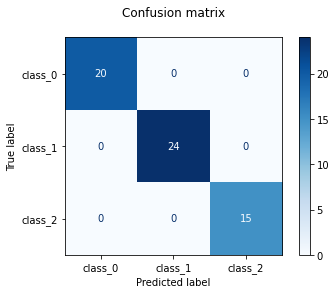

In [589]:
#Confusion Matrix representation
#Confusion matrix (no date) scikit. Available at: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html (Accessed: February 16, 2023).

cm = confusion_matrix(y_test, y_pred, labels=range(len(class_names)))

disp = ConfusionMatrixDisplay.from_estimator(gnb,X_test,y_test,display_labels=class_names,cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion matrix\n")
print("\n Confusion matrix")
print(disp.confusion_matrix)
plt.show()

Macro-averaged One-vs-Rest ROC AUC score:
1.00


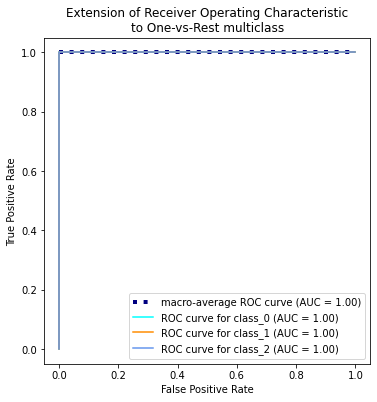

In [590]:
#Calculating the ROC AUC SCORE
#Nkitgupta (2021) Evaluation metrics for multi-class Classification, Kaggle. Kaggle. Available at: https://www.kaggle.com/code/nkitgupta/evaluation-metrics-for-multi-class-classification (Accessed: February 16, 2023).
#Multiclass receiver operating characteristic (ROC) (no date) scikit. Available at: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html (Accessed: February 16, 2023).


n_samples, n_features = X.shape
n_classes = len(np.unique(y))
target_names = wine_dataset.target_names

y_score = gnb.fit(X_train, y_train).predict_proba(X_test)

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape

label_binarizer.transform([2])

class_of_interest = 2
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Variables for our roc plotting
nbg_fpr = fpr["macro"]
nbg_tpr = tpr["macro"]
nbg_roc_auc = roc_auc["macro"]

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

fig, ax = plt.subplots(figsize=(6, 6))



plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
    )


plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
plt.legend()
plt.show()

In [591]:
#Evaluation Scores
mean_precision = np.mean(precision_scores)
print("The Mean precision score for KFold is: ", mean_precision)

mean_accuracy = np.mean(accuracy_score)
print("The Mean accuracy score for KFold is: ", mean_accuracy)

mean_recall_score = np.mean(recall_scores)
print("The Mean recall score for KFold is: ", mean_recall_score)

mean_f1_score = np.mean(f1_scores)
print("The Mean f1 score for KFold is: ", mean_f1_score)

The Mean precision score for KFold is:  0.6633771929824561
The Mean accuracy score for KFold is:  0.6633771929824561
The Mean recall score for KFold is:  0.6275961608842044
The Mean f1 score for KFold is:  0.6435401012412958


**ROC CURVE for all Classification Method**

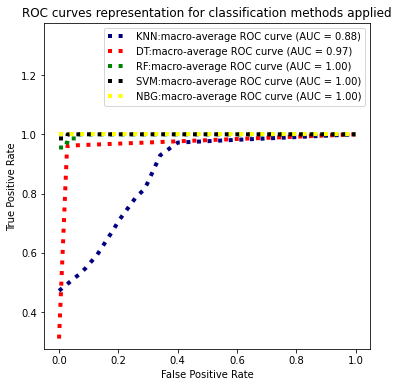

In [601]:
#Graphical representation of ROC curves represented in single plot
fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(knn_fpr,knn_tpr,label=f"KNN:macro-average ROC curve (AUC = {knn_roc_auc:.2f})",color="navy",linestyle=":",linewidth=4,)

plt.plot(dtc_fpr,dtc_tpr,label=f"DT:macro-average ROC curve (AUC = {dtc_roc_auc:.2f})",color="red",linestyle=":",linewidth=4,)

plt.plot(rfc_fpr,rfc_tpr,label=f"RF:macro-average ROC curve (AUC = {rfc_roc_auc:.2f})",color="green",linestyle=":",linewidth=4,)

plt.plot(svm_fpr,svm_tpr,label=f"SVM:macro-average ROC curve (AUC = {svm_roc_auc:.2f})",color="black",linestyle=":",linewidth=4,)

plt.plot(nbg_fpr,nbg_tpr,label=f"NBG:macro-average ROC curve (AUC = {nbg_roc_auc:.2f})",color="yellow",linestyle=":",linewidth=4,)

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curves representation for classification methods applied")
plt.legend()
plt.show()

# **References**

1.   Nkitgupta (2021) Evaluation metrics for multi-class Classification, Kaggle. Kaggle. Available at: https://www.kaggle.com/code/nkitgupta/evaluation-metrics-for-multi-class-classification (Accessed: February 16, 2023). 
2.   Confusion matrix (no date) scikit. Available at: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html (Accessed: February 16, 2023). 
3. Multiclass receiver operating characteristic (ROC) (no date) scikit. Available at: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html (Accessed: February 16, 2023). 
4. 2.3. clustering (no date) scikit. Available at: https://scikit-learn.org/stable/modules/clustering.html (Accessed: February 16, 2023). 
5. McGregor, M. (2020) 8 clustering algorithms in machine learning that all data scientists should know, freeCodeCamp.org. freeCodeCamp.org. Available at: https://www.freecodecamp.org/news/8-clustering-algorithms-in-machine-learning-that-all-data-scientists-should-know/ (Accessed: February 16, 2023). 
6. 1. supervised learning (no date) scikit. Available at: https://scikit-learn.org/stable/supervised_learning.html (Accessed: February 16, 2023). 
7. SKLEARN.DECOMPOSITION.PCA (no date) scikit. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html (Accessed: February 17, 2023). 
8. Sklearn.preprocessing.StandardScaler (no date) scikit. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html (Accessed: February 17, 2023). 


